In [1]:
pip install comut

Note: you may need to restart the kernel to use updated packages.


In [2]:
## import requirements
from comut import comut
from comut import fileparsers
import pandas as pd
import numpy as np
import palettable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import rcParams
from matplotlib.ticker import AutoMinorLocator # this function sets the location of the minor tick mark
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date

In [5]:
## load all data separately
purity_df = pd.read_csv('purity.csv', sep = ',')
ploidy_df = pd.read_csv('ploidy.csv', sep = ',')
gender_df = pd.read_csv('gender.csv', sep = ',')
sample_type_df = pd.read_csv ('sample_types.csv', sep = ",")
wgs_type_df = pd.read_csv ('wgs_type.csv', sep = ",")
rna_seq_df = pd.read_csv ('rna_seq.csv', sep = ",")
tumor_site_df = pd.read_csv ('tumor_site.csv', sep = ",")
bio_process_df = pd.read_csv ('bio_process.csv', sep = ",")
normal_control_df = pd.read_csv ('normal_control.csv', sep = ",")
therapy_df = pd.read_csv ('therapy.csv', sep = ",")
#class_freq_df = pd.read_csv('sample_freq.csv', sep = ",")
tmb_df = pd.read_csv('indel_snv.csv', sep =",")
tum_df = pd.read_csv('tumor_data.csv', sep =",") #my mutation data
genes = ['MTOR', 'SETD2', 'TP53', 'ARID1B', 'NOTCH2', 'SMARCA4', 'NTRK1', 'COL2A1', 'KMT2D', 'STAT5B', 'NT5C2', 'KDR', 'EIF3E', 'SF3B1', 'KMT2C', 'CDKN2C', 'ATM', 'BRCA1', 'NAN']
sv_count_df = pd.read_csv('SV_class_type.csv', sep = ',')

In [38]:
# set sample order based on therapy
sample_order = list(therapy_df['sample'])

## add mapping and kwargs for colors, range for the value data range
## color mapping for categorical and continuous data

purity_mapping = {'Absent': {'facecolor': 'blue'}}
ploidy_mapping = {'Absent': {'facecolor': 'blue'}}
indicator_kwargs = {'color': 'black', 'marker': 'o', 'linewidth': 1, 'markersize': 3}
rna_seq_mapping = {'X': 'darkgreen', 'Not applicable': 'whitesmoke'}
wgs_type__mapping = {'standard':'#D35FB7', 'linked-read':'#A3B7F9'}
normal_control_mapping = {'Blood':'red', 'Adj Normal':'green', 'Adj Kidney':'blue'}
bio_process_mapping = {'biopsy':'yellow', 'resection':'aquamarine', 'none':'whitesmoke'}
tumor_site_mapping = {'Primary R Kidney':'#CDB1AD', 'LUL Met':'#FADFE2', 'Primary L Kidney':'#DECBE3', 'Primary Kidney':'darkviolet', 'L Kidney':'#BDB8AD', 'R Kidney': '#C6D4E1', 'LN Met':'#44749D', 'LPA Node':'#5D6E9E', 'Psoas Muscle Met':'#FFD700'}
therapy_mapping = {'N':'whitesmoke','Pazopanib':'#EE442F','Temsirolimus':'#F9F4EC', 'Pre-Len/Evero':'#332288'}
sample_type_mapping = {'Frozen':'#2A385B', 'FFPE':'#8B7F47'}
gender_mapping = {'Male':'#FFC107', 'Female':'#40B0A6'}

#class_freq_mapping = {'Frame shift': '#D55E00', 'Missense': '#FBDD7E', 'Stop gained': '#009E73', 'Splice site':'#332288', 'Synonymous': '#0072B2', 'High':'cyan', 'Moderate':'#7f7f7f', 'Low':'#17becf'}
tmb_bar_mapping = {'INDEL':'#9ACD32','SNV':'#D1B26F'}
tum_mapping = {'Missense': '#4B00B2', 'Frameshift': '#D55E00', 'Splice site': '#F0E442', 'Stop gained': '#332288', 'NAN': '#C0C0C0'}
sv_count_bar_mapping = {'Others': '#F5F5DC', 'Balanced':'#FFC0CB', 'Deletion':'#929591', 'Inversion-bal':'#E6E6FA', 'Inversion-Foldback':'#ADD8E6', 'Inversion-unbal': '#332288', 'Tandem Dup': '#E50000', 'Trans-Bal': '#009E73', 'Trans-Unbal':'#F5DEB3','Unbalanced':'#DDA0DD'}


In [39]:
wgs_comut = comut.CoMut()
value_order = ['Frameshift']
priority = ['Frameshift']
wgs_comut.add_categorical_data(tum_df, name = 'Mutation type', category_order = genes, value_order= value_order, mapping = tum_mapping, tick_style = 'italic', priority=priority)

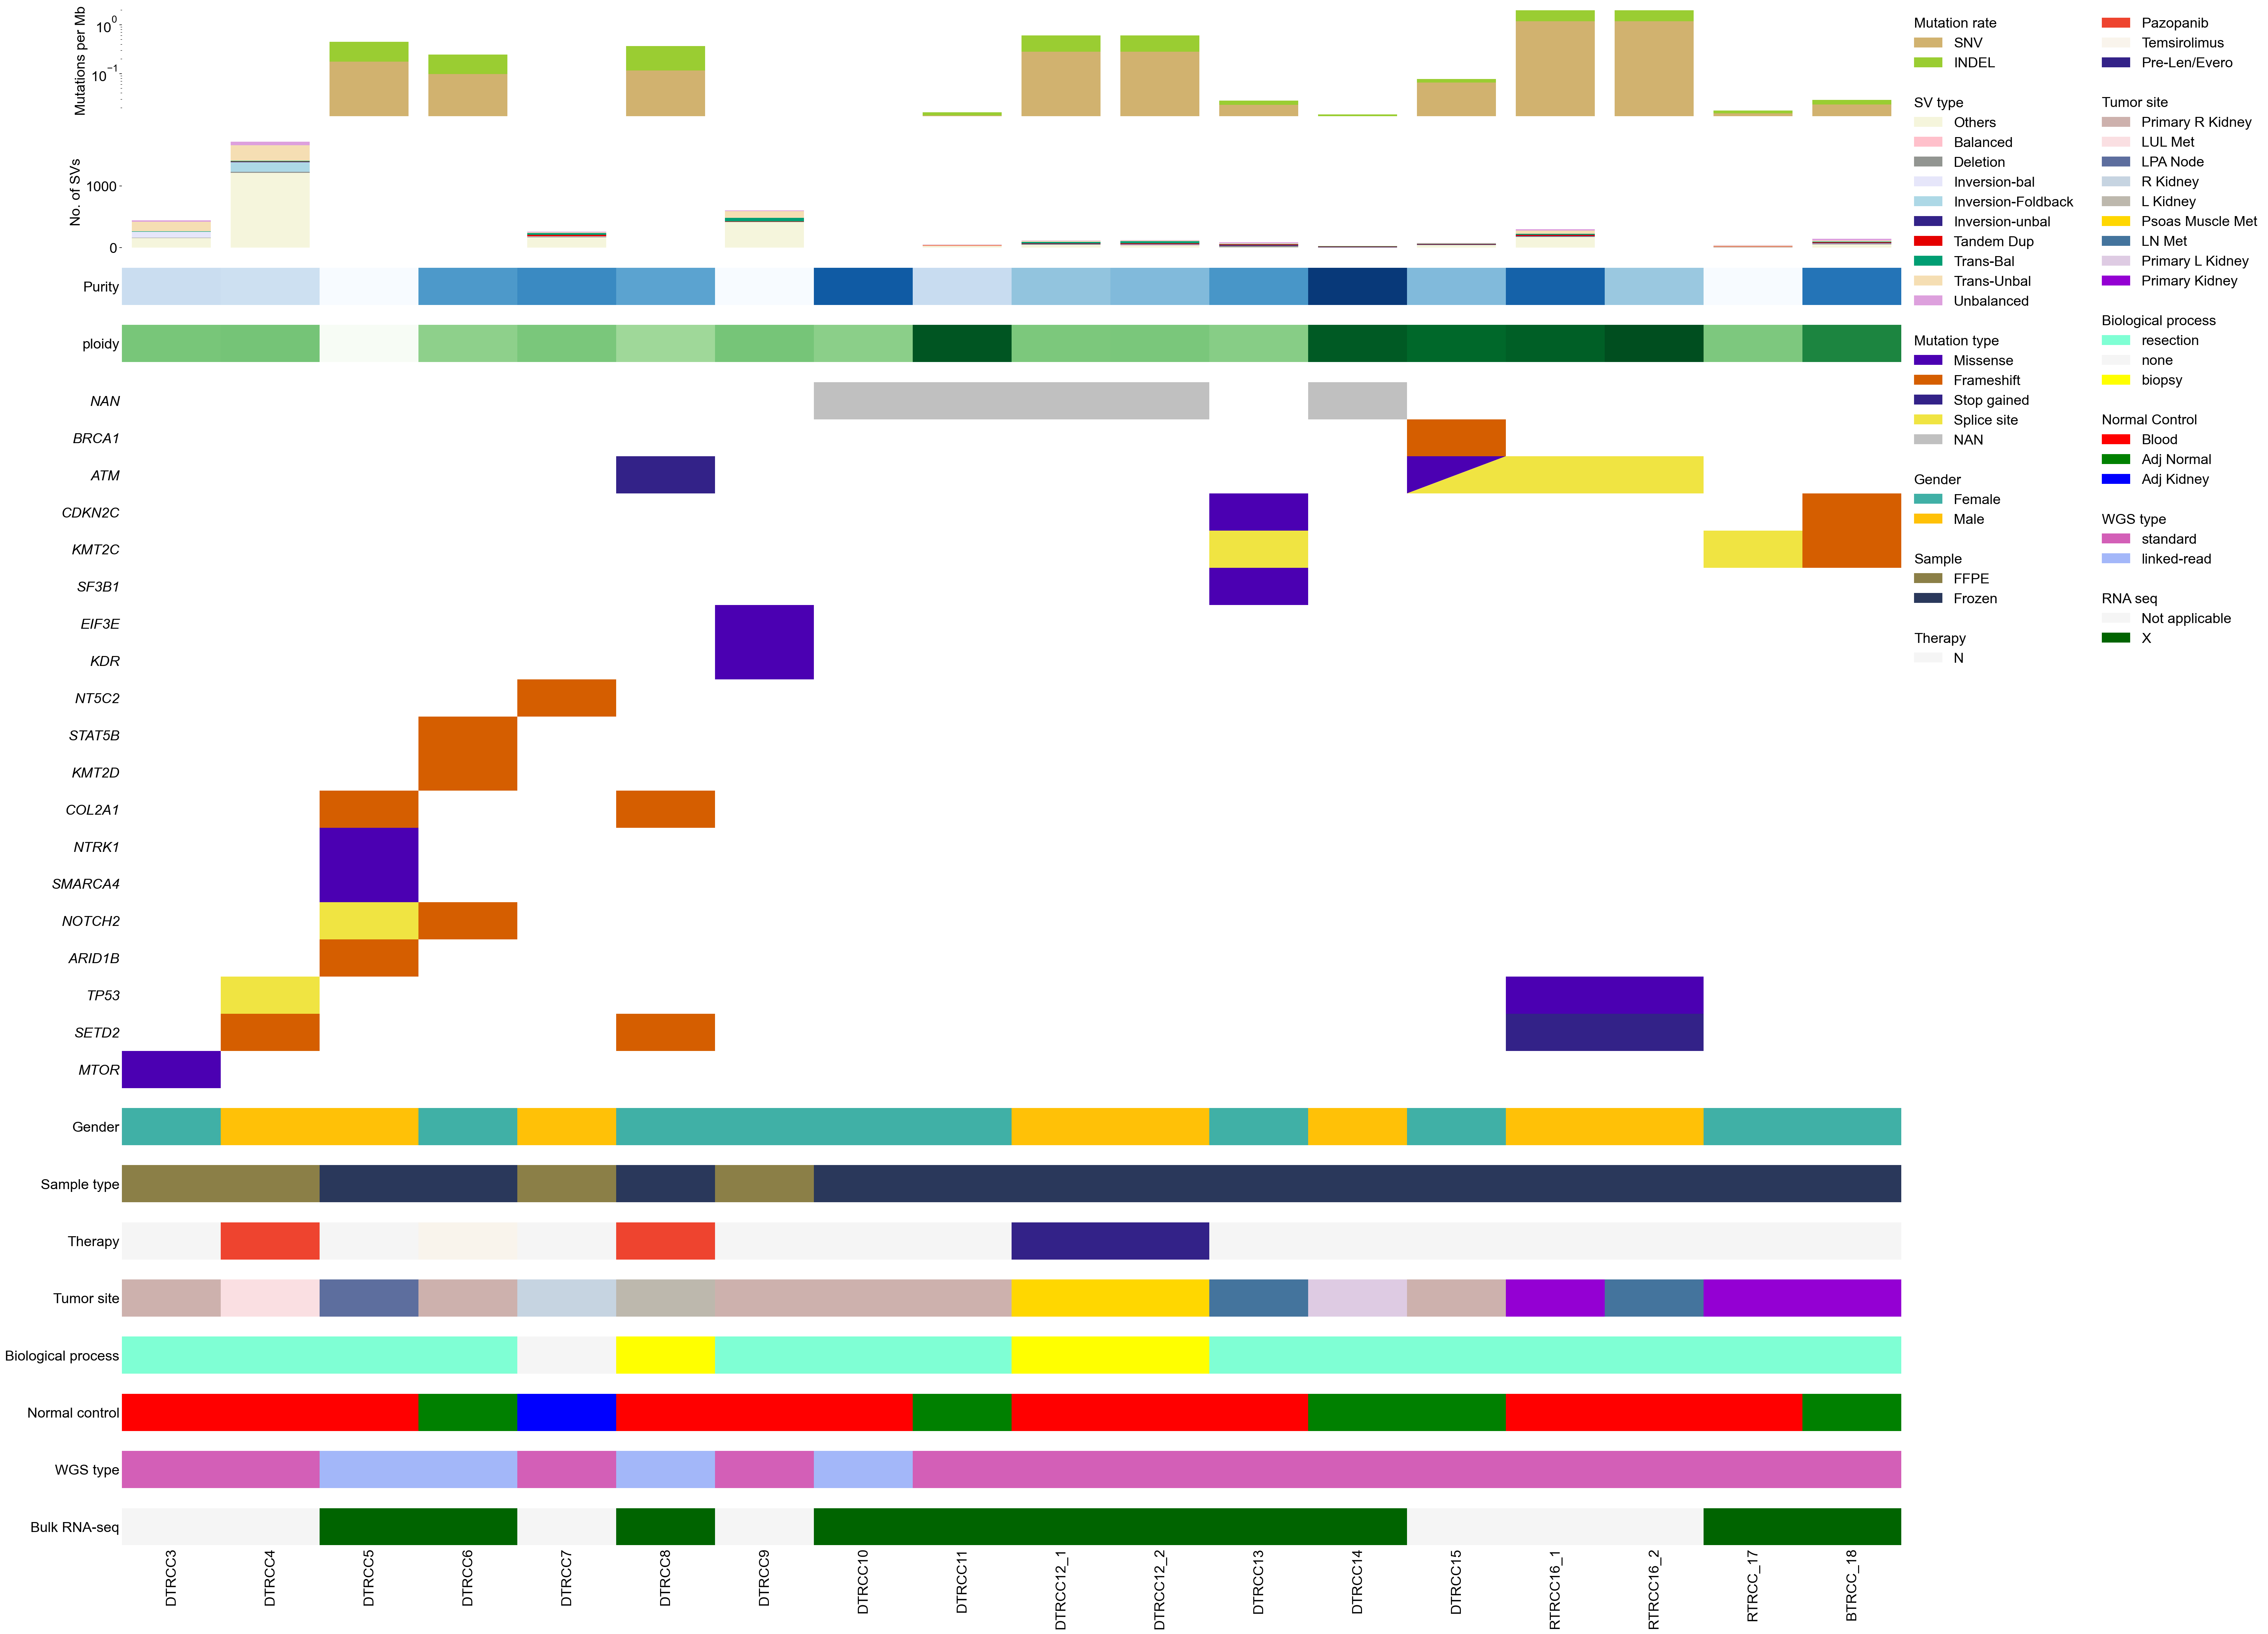

In [50]:
wgs_comut = comut.CoMut()
wgs_comut.samples = sample_order

# adding categorical data in order of gender, therapy, tumor site, bio process, normal control, wgs type and rna seq type
# for now we don't have a continuous data to add?
wgs_comut.add_categorical_data(rna_seq_df, name = 'RNA seq', mapping = rna_seq_mapping)
wgs_comut.add_categorical_data(wgs_type_df, name = 'WGS type', mapping = wgs_type__mapping)
wgs_comut.add_categorical_data(normal_control_df, name = 'Normal Control', mapping = normal_control_mapping)
wgs_comut.add_categorical_data(bio_process_df, name = 'Biological process', mapping = bio_process_mapping)
wgs_comut.add_categorical_data(tumor_site_df, name = 'Tumor site', mapping = tumor_site_mapping)
wgs_comut.add_categorical_data(therapy_df, name = 'Therapy', mapping = therapy_mapping)
wgs_comut.add_categorical_data(sample_type_df, name = 'Sample', mapping = sample_type_mapping)
wgs_comut.add_categorical_data(gender_df, name = 'Gender', mapping = gender_mapping)
##add genes as categorical data
wgs_comut.add_categorical_data(tum_df, name = 'Mutation type', category_order = genes, mapping = tum_mapping, tick_style = 'italic')
wgs_comut.add_continuous_data(ploidy_df, name = 'Ploidy', mapping = 'Greens', cat_mapping = ploidy_mapping, value_range = (0, 4.2))
wgs_comut.add_continuous_data(purity_df, name = 'Purity', mapping = 'Blues', cat_mapping = purity_mapping, value_range = (0, 1))
wgs_comut.add_bar_data(sv_count_df, name = 'SV type', mapping = sv_count_bar_mapping, stacked = True, bar_kwargs = {'width': 0.8, 'edgecolor': 'None'}, ylabel = 'No. of SVs')
wgs_comut.add_bar_data(tmb_df, name = 'Mutation rate', mapping = tmb_bar_mapping, stacked = True, bar_kwargs = {'width': 0.8, 'edgecolor': 'None', 'log':'True'}, ylabel = 'Mutations per Mb')

# define mapping
#bar_kwargs = {'width': 0.8, 'edgecolor': 'black'}
bar_mapping = {'INDEL' : 'purple', 'SNV' : 'pink'}
bar_mapping = {'Others' : 'purple', 'SNV' : 'pink'}

#plot
wgs_comut.plot_comut(figsize=(45,40))
wgs_comut.add_unified_legend(border_white = border_white, ncol = 2)

Bbox(x0=0.125, y0=0.3491187384044526, x1=0.9, y1=0.6951020408163265)


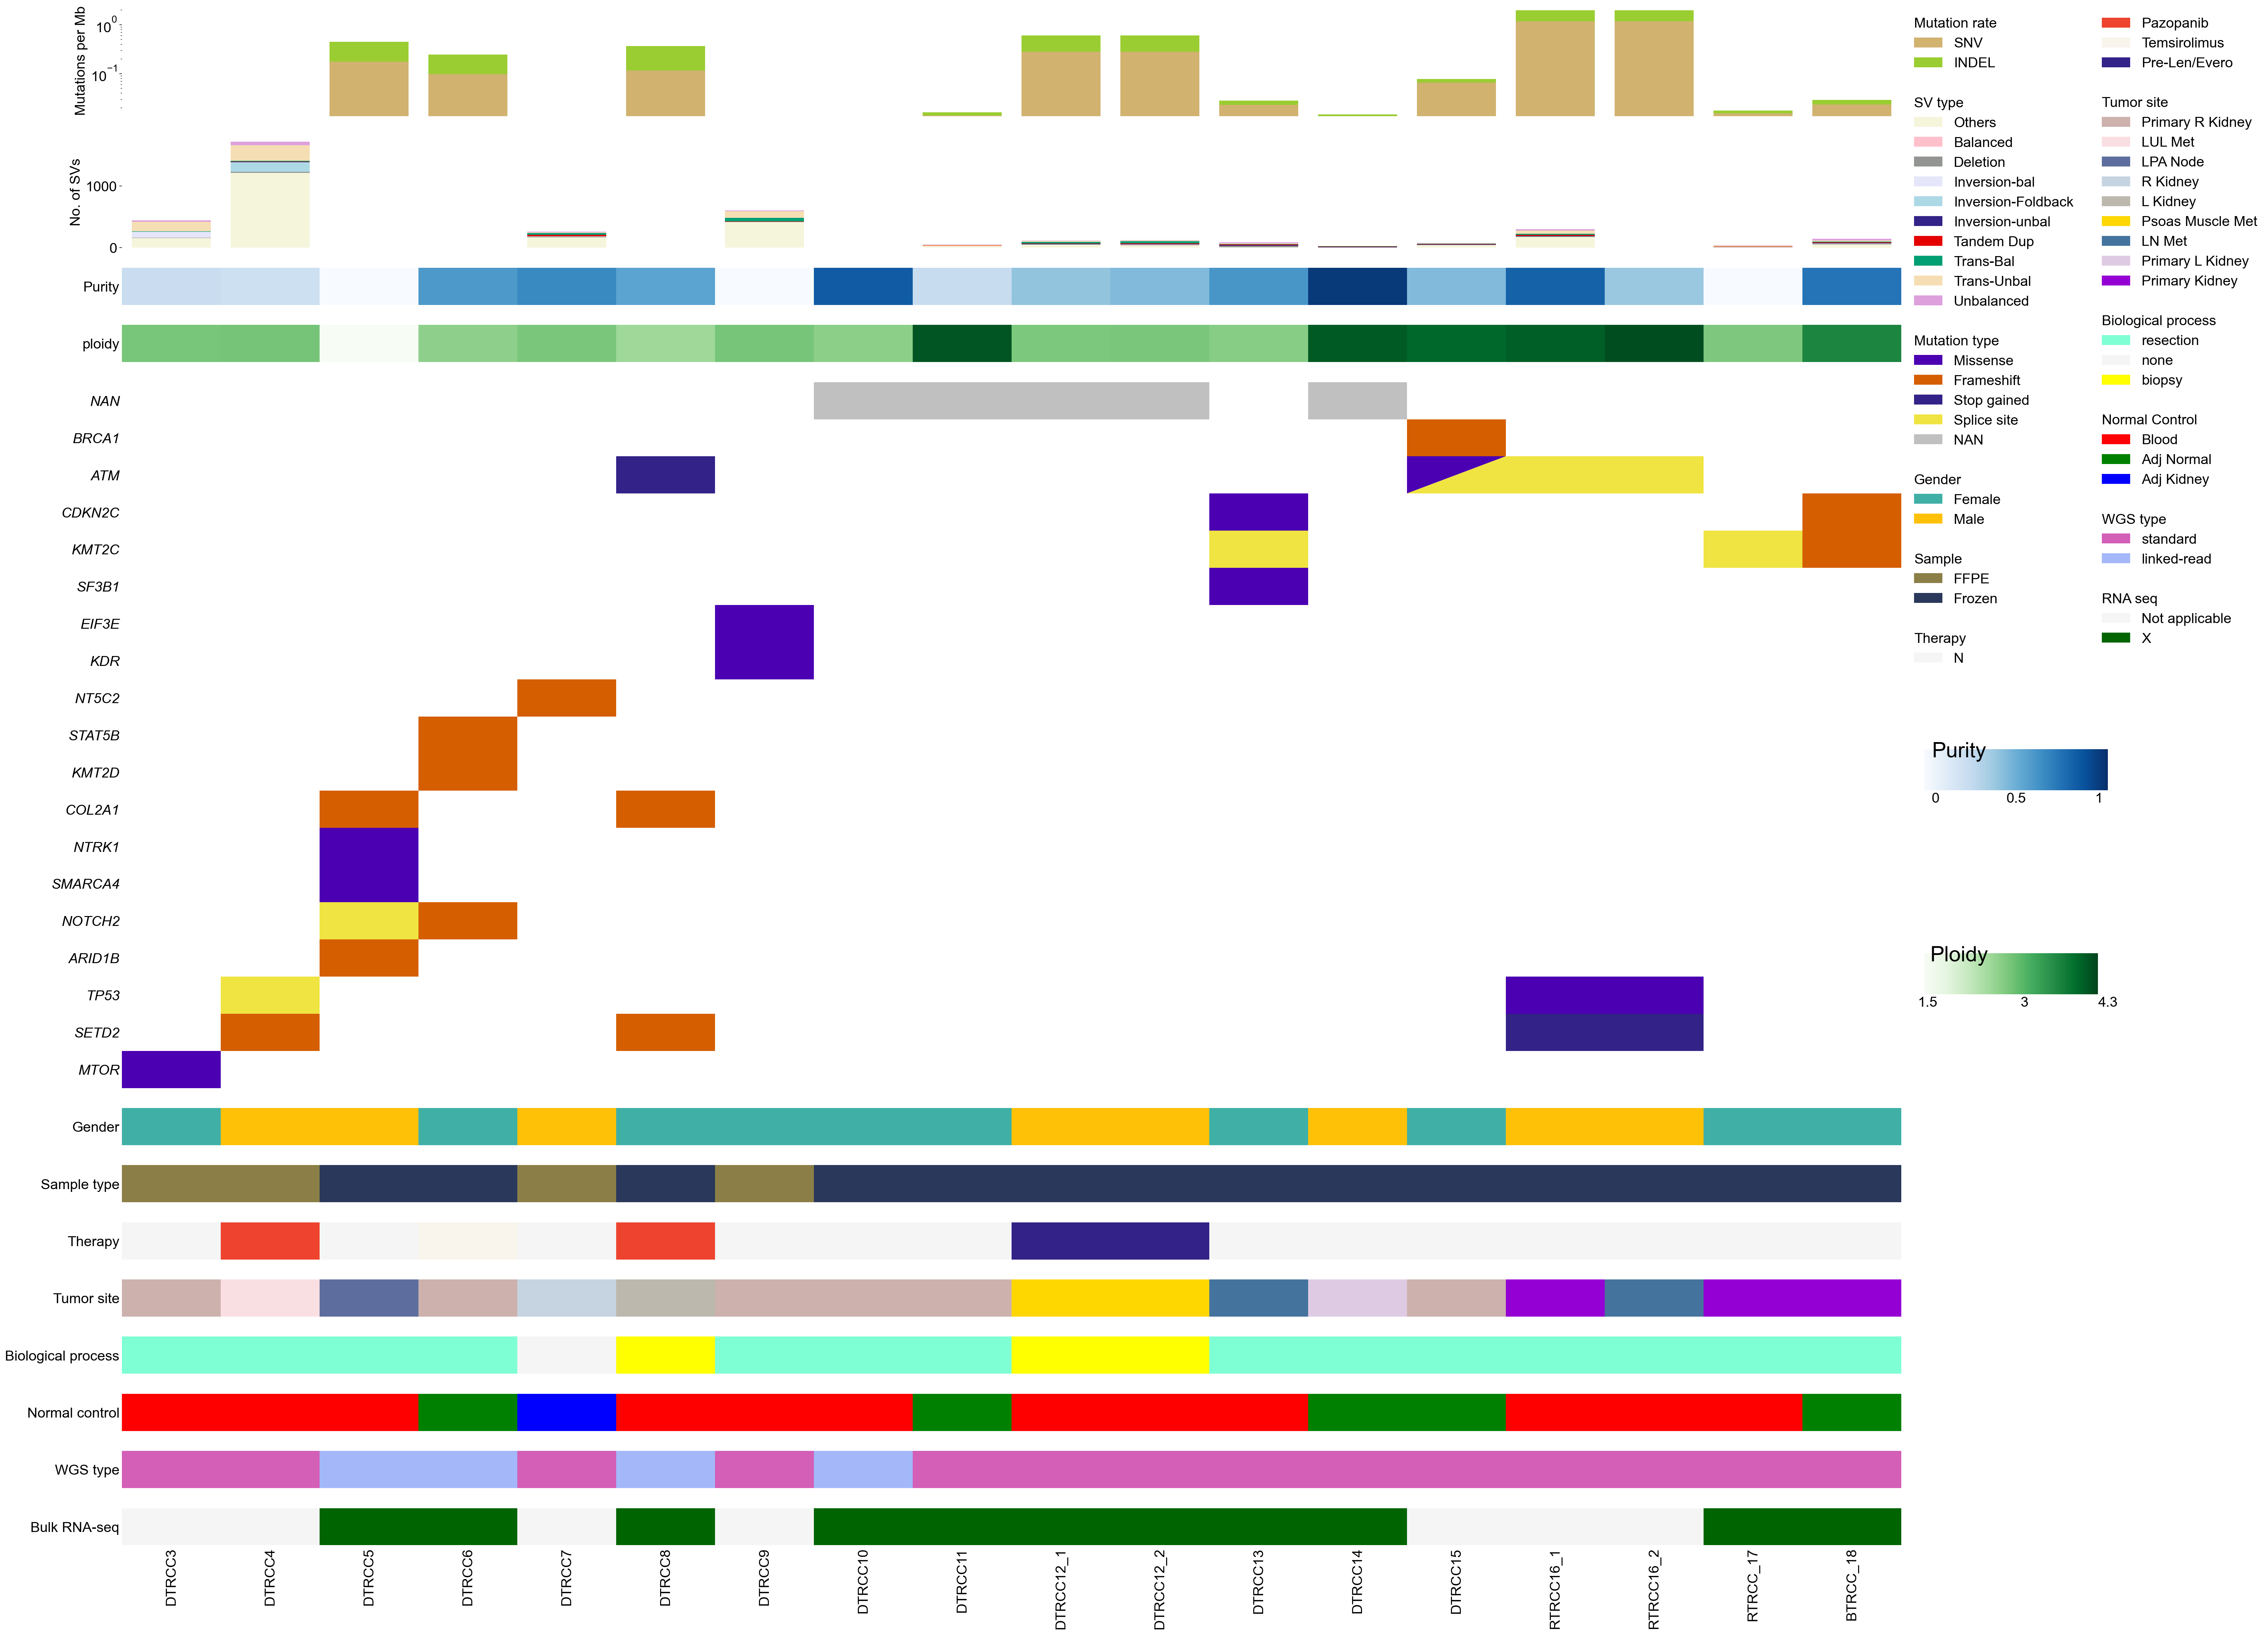

In [51]:
#additional for purity and ploidy
########purity settings
#return the exact location of the purity axis in figure coordinates 
#(as bottom left corner, top right corner)
purity_pos = wgs_comut.axes['Mutation type'].get_position()
print(purity_pos)
x, y, x1, y1 = purity_pos.x0, purity_pos.y0, purity_pos.x1, purity_pos.y1 

purity_ax = wgs_comut.figure.add_axes([x1+0.01, y1-0.2, 0.08, 0.02])

# purity ranges from 0 to 1
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
purity_colorbar = wgs_comut.figure.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='Blues'), cax=purity_ax, orientation='horizontal')

# remove tick marks and move tick labels slightly inwards. Also remove black border
purity_colorbar.ax.tick_params(size=0)
purity_colorbar.set_ticks([0.06,0.5,0.95])
purity_colorbar.set_ticklabels([0,0.5,1])
purity_colorbar.outline.set_visible(False)

# set title of colorbar to line up with other legend elements
purity_colorbar.set_label('Purity', labelpad = -90, x = 0.19, fontsize = 30)

#########ploidy settings
ploidy_ax = wgs_comut.figure.add_axes([x1+0.01, y1-0.3, 0.08, 0.02])

#ploidy rangeds form 1.5 to 4.053
norm = matplotlib.colors.Normalize(vmin=1.5, vmax=4.1)

ploidy_colorbar = wgs_comut.figure.colorbar(matplotlib.cm. ScalarMappable(norm=norm, cmap='Greens'), cax=ploidy_ax, orientation='horizontal')

# remove tick marks and move tick labels slightly inwards. Also remove black border
ploidy_colorbar.ax.tick_params(size=0)

ploidy_colorbar.set_ticks([1.55,3,4.25])
ploidy_colorbar.set_ticklabels([1.5,3,4.3])
ploidy_colorbar.outline.set_visible(False)

# set title of colorbar to line up with other legend elements
ploidy_colorbar.set_label('Ploidy', labelpad = -90, x = 0.19, fontsize = 30) 

####plot and save the fig

#wgs_comut.figure.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_nearfinal5.svg', format='png', bbox_inches='tight', dpi= 300)

wgs_comut.figure.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_nearfinal5.pdf', format='pdf', bbox_inches='tight')

wgs_comut.figure

In [53]:
## this is from Minjeong and can be added if necessay

custom_rcParams = {
  'font.family': 'Arial',
  'font.size': 18, 
  'axes.titlesize' : 18, 
  'axes.labelsize': 20, #plot label size
  'legend.fontsize': 20, #legend size
  'xtick.labelsize': 20, #side bar plot x-axis ; patients
  'ytick.labelsize': 20 #y-axis
}

rcParams.update(custom_rcParams)

#Adjust height accordingly to mutation data, e.g. if mutation data has 11 genes, its relative height is 11

heights = {'Mutation type': 20, 'SV type': 30, 'Ploidy': 2.5, 'Purity': 2.5, 'Gender' : 2.5, 'Sample' : 2.5, 'Tumor site': 2.5, 'Therapy': 2.5,
           'Biological process' : 2.5, 'Normal Control' : 2.5, 'WGS type' : 2.5, 'RNA seq' : 2.5}

#can be optional
#widths = [0.6, 4.4]

# decrease size of side bar--relative widths of the sideplots in the comut vs. the main figure
#	widths = [1, 5, 1, 5] #two side bar plot

# move side bar plot slightly closer to comut
wspace = 0.12 #0.18
border_white = ['Absent']

#define structure from bottom to top
structure = [['Mutation type'],
             ['Mutation rate'],
             ['SV type'],
             ['RNA seq'], 
             ['WGS type'], 
             ['Normal Control'],
             ['Biological process'],
             ['Sample'], 
             ['Gender'],
             ['Ploidy', 'Purity', 'Tumor site', 'Therapy']]

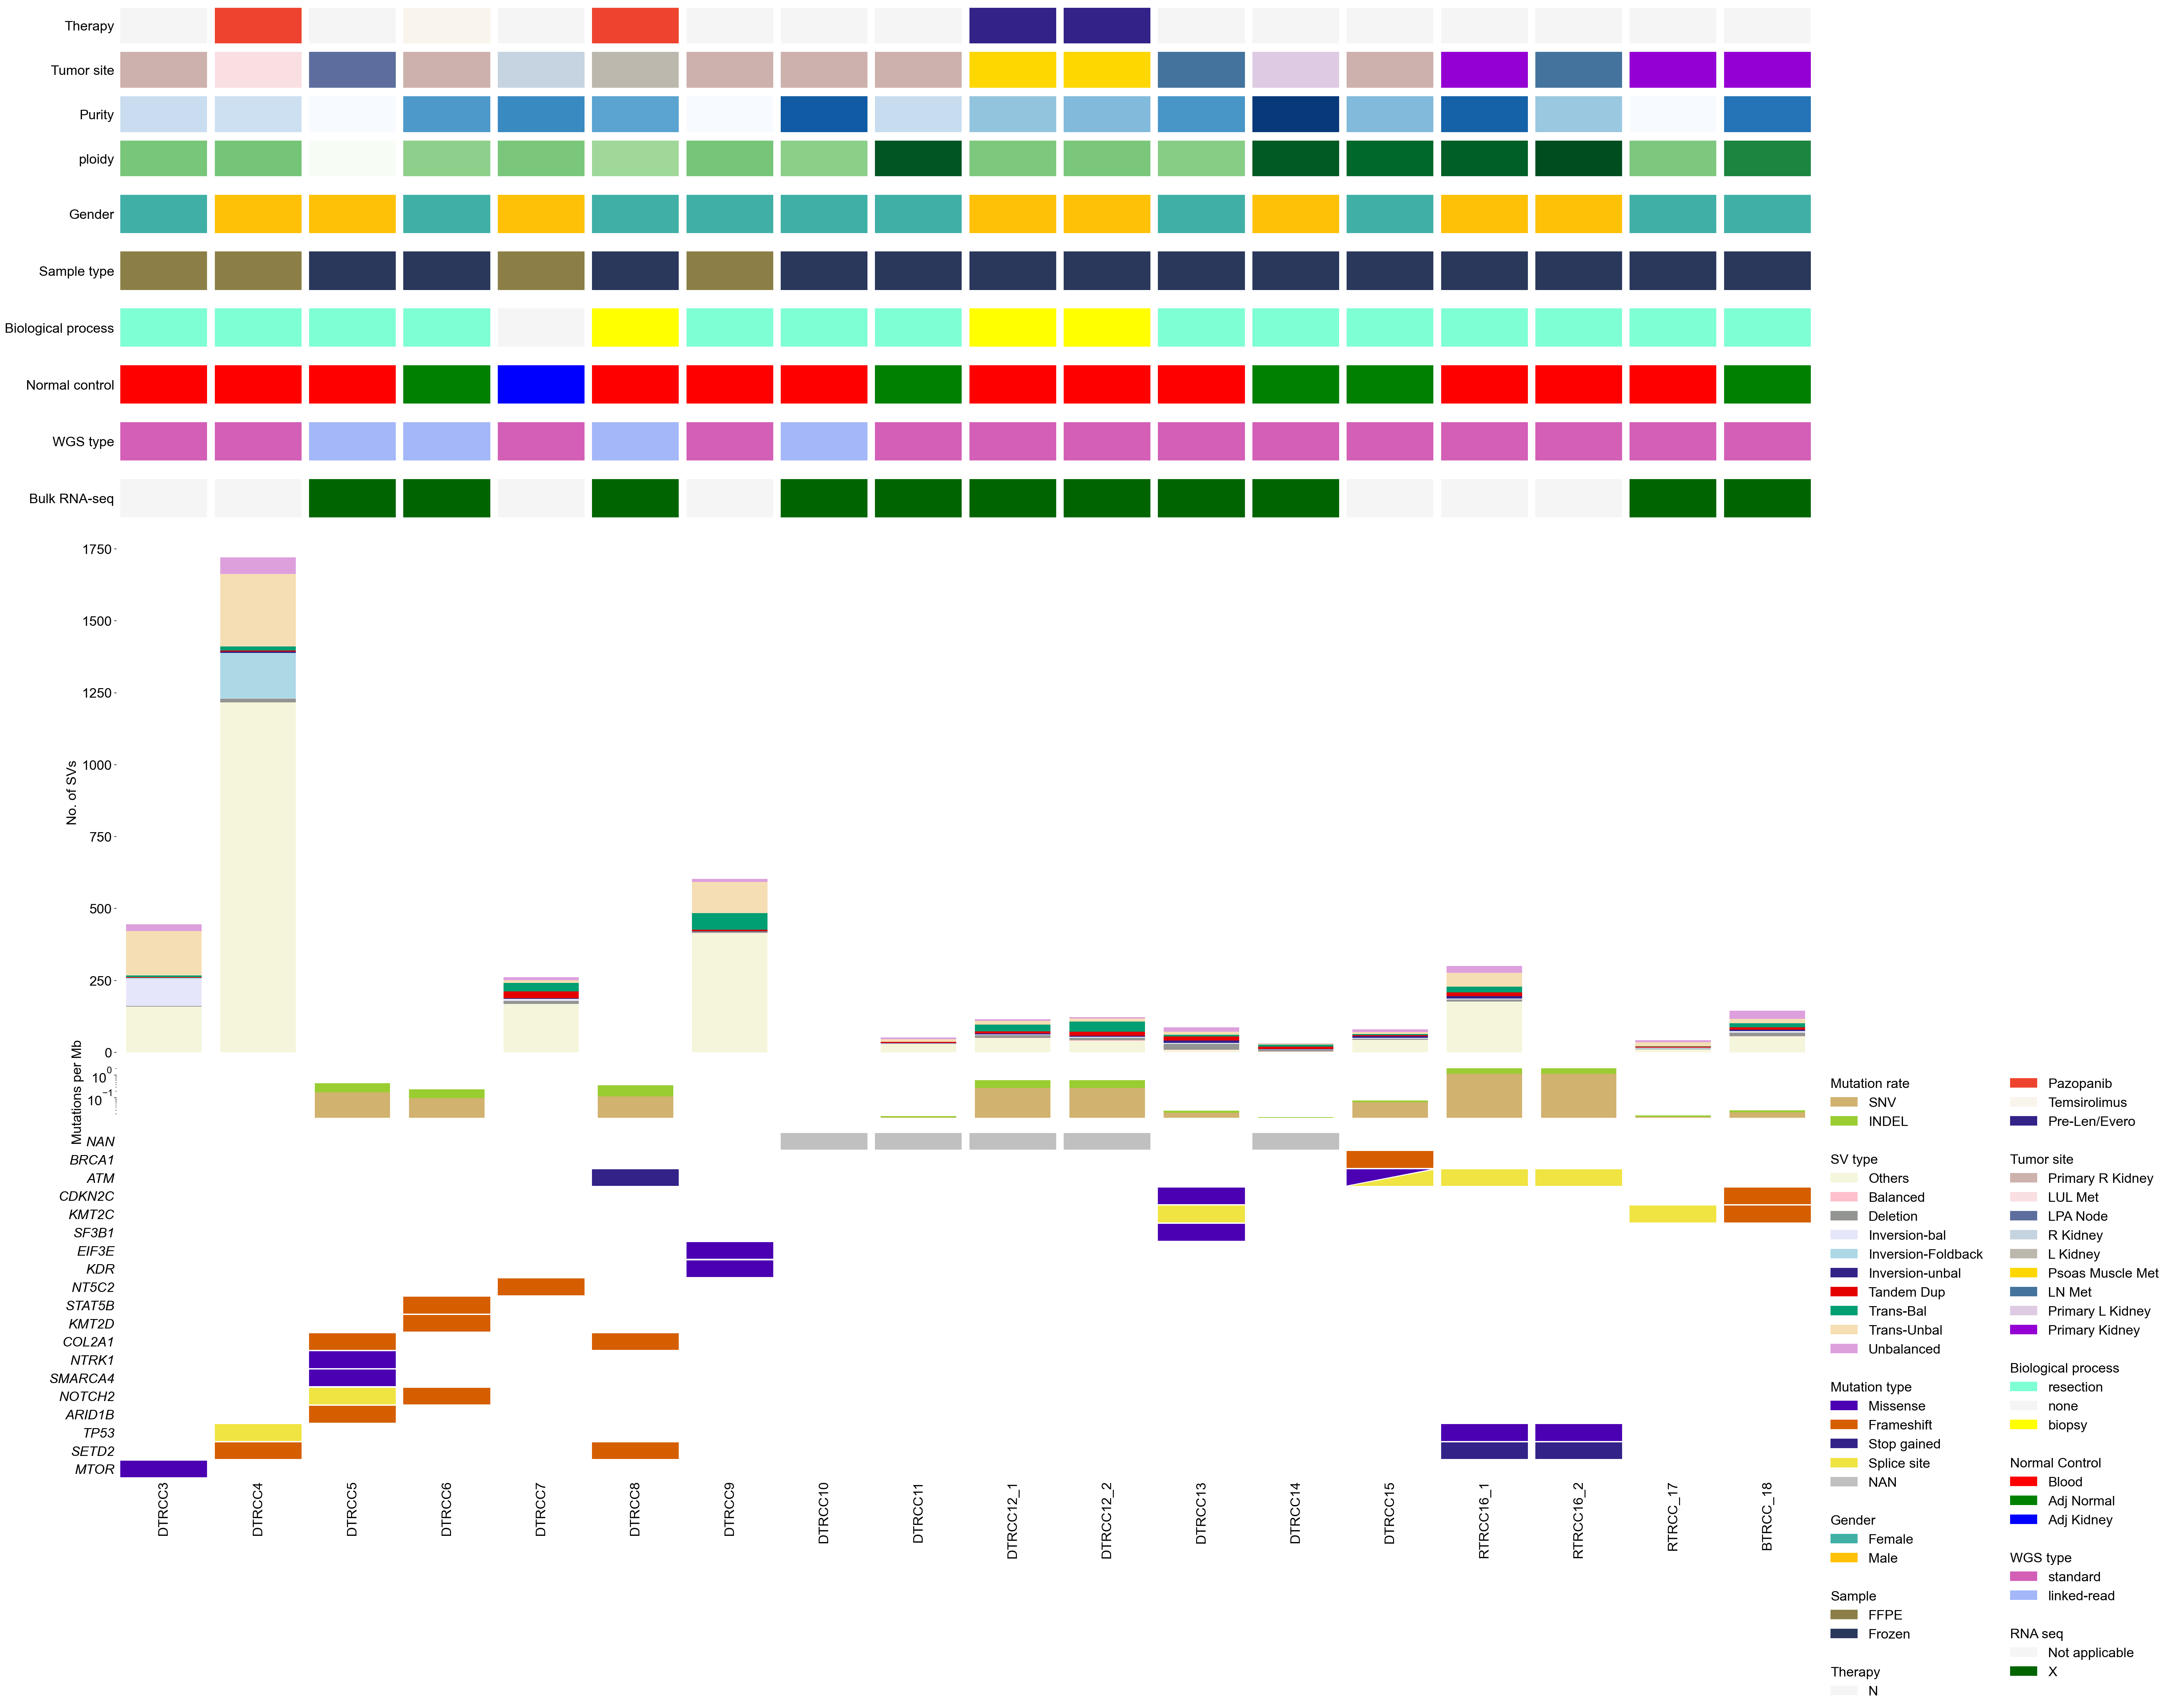

In [54]:

wgs_comut.plot_comut(figsize = (45, 40), x_padding = 0.04, y_padding = 0.04, tri_padding = 0.03, hspace = 0.1, heights = heights, wspace = wspace, structure = structure, subplot_hspace = 0.1)
wgs_comut.add_unified_legend(border_white = border_white, ncol = 2)

Bbox(x0=0.125, y0=0.12499999999999989, x1=0.9, y1=0.3026052693483886)


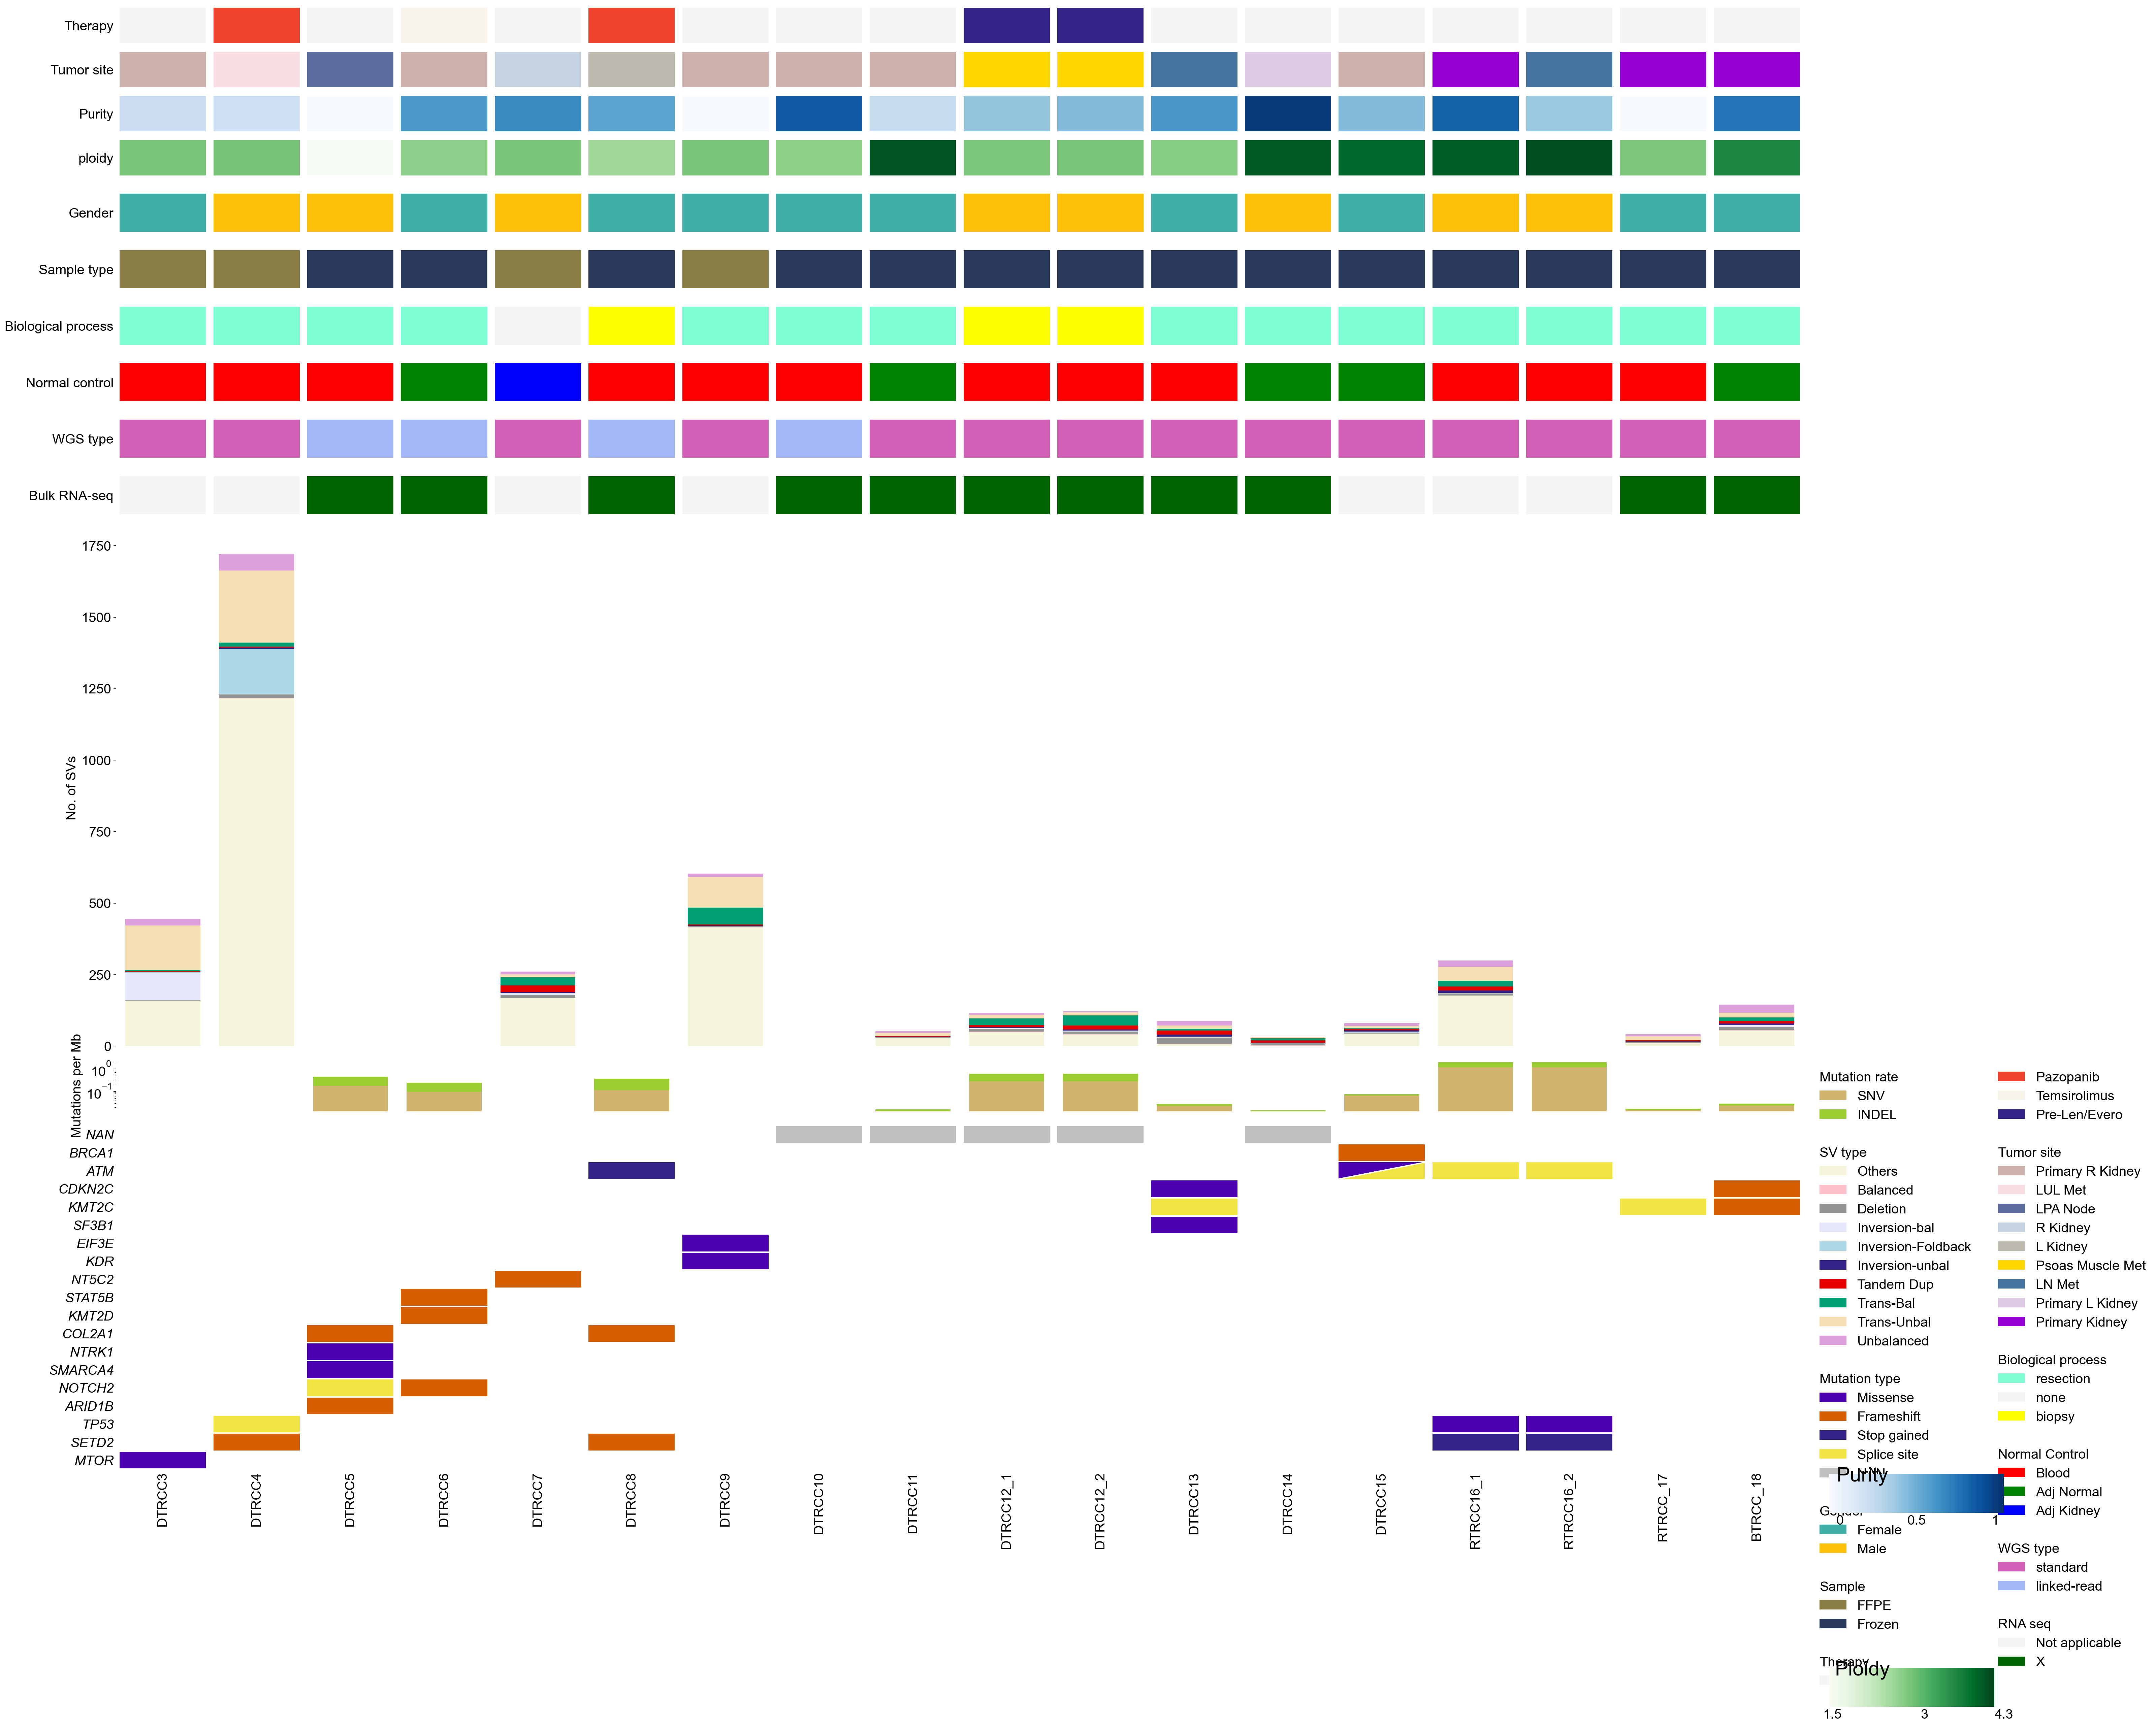

In [55]:
#additional for purity and ploidy
########purity settings
#return the exact location of the purity axis in figure coordinates 
#(as bottom left corner, top right corner)
purity_pos = wgs_comut.axes['Mutation type'].get_position()
print(purity_pos)
x, y, x1, y1 = purity_pos.x0, purity_pos.y0, purity_pos.x1, purity_pos.y1 

purity_ax = wgs_comut.figure.add_axes([x1+0.01, y1-0.2, 0.08, 0.02])

# purity ranges from 0 to 1
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
purity_colorbar = wgs_comut.figure.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='Blues'), cax=purity_ax, orientation='horizontal')

# remove tick marks and move tick labels slightly inwards. Also remove black border
purity_colorbar.ax.tick_params(size=0)
purity_colorbar.set_ticks([0.06,0.5,0.95])
purity_colorbar.set_ticklabels([0,0.5,1])
purity_colorbar.outline.set_visible(False)

# set title of colorbar to line up with other legend elements
purity_colorbar.set_label('Purity', labelpad = -90, x = 0.19, fontsize = 30)

#########ploidy settings
ploidy_ax = wgs_comut.figure.add_axes([x1+0.01, y1-0.3, 0.08, 0.02])

#ploidy rangeds form 1.5 to 4.053
norm = matplotlib.colors.Normalize(vmin=1.5, vmax=4.1)

ploidy_colorbar = wgs_comut.figure.colorbar(matplotlib.cm. ScalarMappable(norm=norm, cmap='Greens'), cax=ploidy_ax, orientation='horizontal')

# remove tick marks and move tick labels slightly inwards. Also remove black border
ploidy_colorbar.ax.tick_params(size=0)

ploidy_colorbar.set_ticks([1.55,3,4.25])
ploidy_colorbar.set_ticklabels([1.5,3,4.3])
ploidy_colorbar.outline.set_visible(False)

# set title of colorbar to line up with other legend elements
ploidy_colorbar.set_label('Ploidy', labelpad = -90, x = 0.19, fontsize = 30) 

####plot and save the fig

wgs_comut.figure.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_nearfinal6.svg', format='png', bbox_inches='tight', dpi= 300)

wgs_comut.figure.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_nearfinal6.pdf', format='pdf', bbox_inches='tight')

wgs_comut.figure